O objetivo desse curso é entender o que é clusterização, ou seja, nós vamos entender o que significa agrupar/clusterizar na prática. 

In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
caminho_arquivo = "Wine.csv"
df = pd.read_csv(caminho_arquivo)

In [3]:
print("O dado possui", df.shape[0], "amostras e", df.shape[1], "atributos")
df.head()

O dado possui 178 amostras e 14 atributos


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcanity' : 'Alcalinidade_Po',
                        'Magnesium' : 'Magnesio', 'Color_Intensity' : 'Intensidade_cor'})

In [5]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_Po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [6]:
matriz_corr = df.corr()

In [7]:
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_Po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_cor,Hue,OD280,Proline,Customer_Segment
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinidade_Po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Intensidade_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [8]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

/tmp/ipykernel_3837/3744430212.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


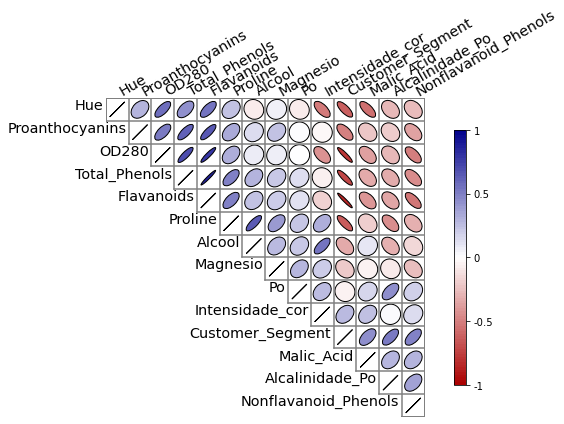

In [9]:
corr_graf = corrplot.Corrplot(matriz_corr)
corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
fig = plt.gcf()
fig.set_size_inches(16,8)
fig.show()

### Normalização

- Para que os dados variem na mesma faixa;
- Nós iremos utilizar uma forma de normalização chamado MinMaxScaler, ou seja, normalização pelo mínimo e pelo máximo;
- Normalização manual:

In [10]:
atributos = df.columns

In [11]:
for atributo in atributos:
    df[atributo] = (df[atributo]-min(df[atributo]))/(max(df[atributo]) - min(df[atributo]))

In [12]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_Po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [13]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_Po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intensidade_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Utilizando uma biblioteca pronta para normalizar

In [32]:
from sklearn import preprocessing

In [45]:
# Recarregando os dados
df = pd.read_csv('Wine.csv')
df = df.rename(columns = {'Alcool': 'Alcool',
                          'Ash': 'Po',
                          'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium': 'Magnesio',
                          'Color_Intensity': 'Intendidade_de_cor'
                          })

In [46]:
colunas = df.columns

In [47]:
min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df) #retornará um numpy array

In [48]:
# coinverter o np array para DF
df = pd.DataFrame(np_df, columns = colunas)

In [37]:
df.describe()

,Alcohol,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intendidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# voltando o df para os valores originais
np_df = min_max_scaler.inverse_transform(df)
df2 = pd.DataFrame(np_df, columns = colunas)

In [40]:
df2.describe()

,Alcohol,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intendidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


- Utilizando o StandardScaler

In [51]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
np_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = colunas)
df.describe().round(2)

,Alcohol,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Intendidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-1.43,-3.68,-2.67,-2.09,-2.11,-1.70,-1.87,-2.07,-1.63,-2.09,-1.90,-1.49,-1.21
25%,-0.79,-0.66,-0.57,-0.69,-0.82,-0.89,-0.83,-0.74,-0.60,-0.80,-0.77,-0.95,-0.78,-1.21
50%,0.06,-0.42,-0.02,0.00,-0.12,0.10,0.11,-0.18,-0.06,-0.16,0.03,0.24,-0.23,0.08
75%,0.84,0.67,0.70,0.60,0.51,0.81,0.85,0.61,0.63,0.49,0.71,0.79,0.76,1.37
max,2.26,3.11,3.16,3.15,4.37,2.54,3.06,2.40,3.49,3.44,3.30,1.96,2.97,1.37
